# What affects the outcome status of a Prosper Loan?
## by (Dominic Nyoni)


## Investigation Overview

This investigation seeks to explore the factors that affect the outcome status of a Prosper Loan. The main factors i focused on were Prosper Score and Borrower/Interest rate.Key findings indicate that Prosper Score and BorrowerRate/interest rate have the most effect on the loan outcome status.In particular,borrowers who have high prosper scores and interest rates below 20% tend to complete payment of their loans as opposed to borrowers with low to average prosper scores and interest rates over 20%. 


## Dataset Overview

The data consists of information regarding 113,937 loans from ProsperLoans, including LoanStatus, BorrowerRate, and ProsperScore. Prosperscore is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

In [35]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [36]:
# load in the dataset into a pandas dataframe
loan_df=pd.read_csv("loan.csv")


In [37]:
#remove duplicated rows
loan_df=loan_df.drop_duplicates()

In [38]:
# convert Loan Status,ProsperScore and IncomeRange into ordered categorical types
categorical_dict = {'LoanStatus': ['Chargedoff','Defaulted','Past Due(1-15 days)','Past Due(16-30 days)','Past Due(61-90 days)','Past Due(91-120 days)','Past Due(>120 days)','Cancelled','Current','FinalPaymentInProgress','Completed'],
                    'ProsperScore':[1,2,3,4,5,6,7,8,9,10]
            
                   
                   }

for value in categorical_dict:
    ordered_values = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = categorical_dict[value])
    loan_df[value] = loan_df[value].astype(ordered_values)

In [39]:
loan_df['BorrowerRate']=loan_df['BorrowerRate']*100

## What is the status of loans among our borrowers?

The number of borrowers who have managed to complete their loan payments are almost twice the number of borrowers who have totally failed to complete their payments.We have no borrowers who are past due yet and very few who are making their final payments.The majority are currently making their loan payments,but they are not the focus in our investigation.
 

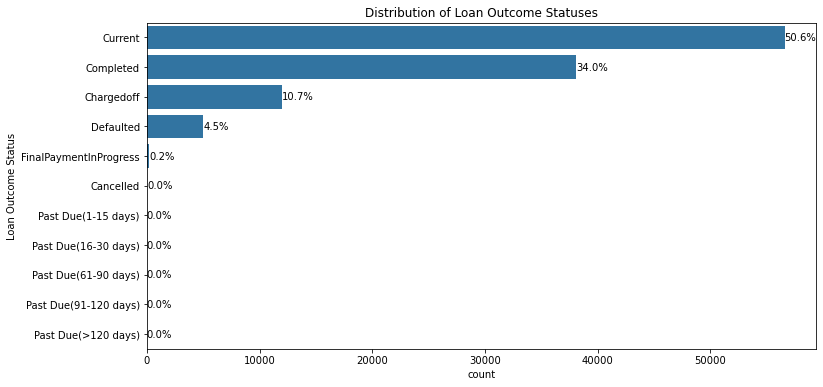

In [40]:
rcParams['figure.figsize'] = 12,6
# Returns the sum of all not-null values in y column
total_count = loan_df["LoanStatus"].value_counts().sum()
category_counts = loan_df["LoanStatus"].value_counts(sort=True)
# Get the unique values of the `type` column, in the decreasing order of the frequency.
category_order = category_counts.index
    
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df, y="LoanStatus", color=base_color, order=category_order);
plt.ylabel('Loan Outcome Status')
plt.title('Distribution of Loan Outcome Statuses')
    
# Logic to print the proportion percentages on the bars
for i in range (category_counts.shape[0]):
        count = category_counts[i]
        # Convert count into a percentage, and then into string
        pct_string = '{:.1%}'.format(count/total_count)
        # Print the string value on the bar.
        plt.text(count+1, i, pct_string, va='center')
    

In [41]:
#For this part,I have decided to melt down my categories into fewer ones that i feel better convey their meaning.
#The loan outcome will be categorized into two groups i.e. borrowers who managed to complete their loan payments and those that failed. 
#ProsperScores will be categorized into three groups which are:low-scores(1-4);average-scores(5-6) and high-scores(7-10).

def meltCategories():
    loan_df['ProsperScore'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10],
    value=['lowscore','lowscore','lowscore','lowscore','avgscore','avgscore','highscore','highscore','highscore','highscore'],inplace=True)
    loan_df['LoanStatus'].replace(to_replace=["Chargedoff","Defaulted"],
    value=['failed-to-complete','failed-to-complete'],inplace=True)
    

    prosperscore = ['lowscore', 'avgscore', 'highscore']
    income_range=['low-income','avg-income','high-income']
    loan_status=['failed-to-complete','Completed']
   
    prosperscores = pd.api.types.CategoricalDtype(ordered=True, categories=prosperscore)
    loanstatuses= pd.api.types.CategoricalDtype(ordered=True, categories=loan_status)
  
    loan_df['ProsperScore'] =loan_df['ProsperScore'].astype(prosperscores);
    loan_df['LoanStatus'] =loan_df['LoanStatus'].astype(loanstatuses);
    
meltCategories()

## Why interest rate really matters

Our chart clearly show that borrowers who completed their loans have a median interest rate that is around 7 points lower than borrowers who failed to do so.Moreover,a comparison of distribution of loans show that the group that completed their payment is more frequent at 10% and 15% interest rates while the group that failed is more congregated at about 31%.
Interest rates also decrease as we go from low prosper score to high ones.In fact the gap between median interest rate of low prosper score and that of high prosper scores is almost 10 points!It is a strong indication that interest rates really do affect the outcome status of loans.



(0.798199045350523, 39.598215498111486)

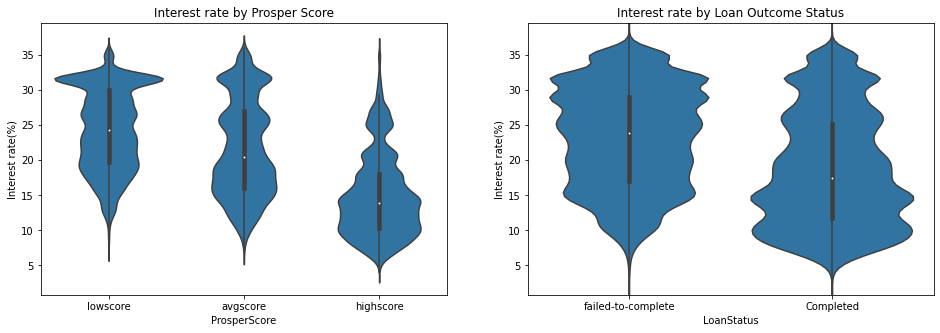

In [42]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
# LEFT plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data=loan_df, x='ProsperScore', y='BorrowerRate', color=base_color)
plt.title('Interest rate by Prosper Score')
plt.ylabel('Interest rate(%)')
plt.xticks(rotation=0);
# RIGHT plot
plt.subplot(1, 2, 2)
sb.violinplot(data=loan_df, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.ylabel('Interest rate(%)')
plt.title('Interest rate by Loan Outcome Status')
plt.xticks(rotation=0);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

## High Prosper scores dominate the list of borrowers who completed their payments

The distribution of prosper scores among borrowers who completed their loan payments show that high prosper scores(7-10) are a clear majority while the low scores(below 5) are the least frequent.



In [43]:
#get loans for borrowers who completed their loan payment
completed=loan_df.query('LoanStatus=="Completed"')

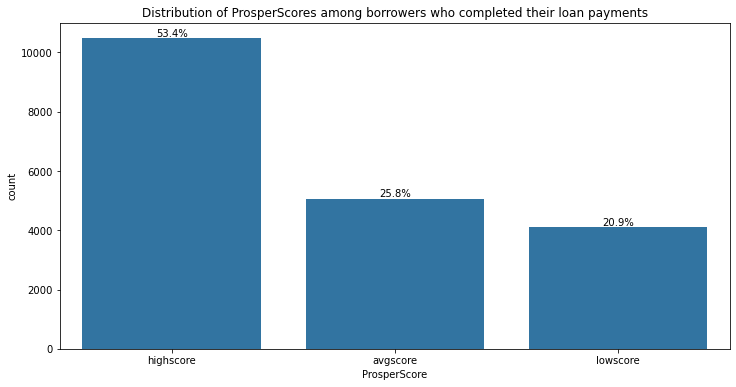

<Figure size 864x432 with 0 Axes>

In [44]:
total=completed['ProsperScore'].value_counts().sum()
category_counts = completed['ProsperScore'].value_counts(False)
# Get the unique values of the `type` column, in the decreasing order of the frequency.
category_order = category_counts.index
base_color = sb.color_palette()[0]
    
ax=sb.countplot(data=completed, x='ProsperScore', color=base_color,order=category_order);
rects=ax.patches
plt.xticks(rotation=0);
plt.figure(figsize=(12,6))
ax.set_title('Distribution of ProsperScores among borrowers who completed their loan payments')
#for annotating the bars with percentages
labels=['{:.1%}'.format(i/total) for i in category_counts]
for rect,label in zip(rects,labels):
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2,height+5,label,ha="center",va="bottom")